# import libraries

In [1]:
# import all necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.pipeline import Pipeline 
import time

# import dataset

In [2]:
# import the dataset

df = pd.read_csv('cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# EDA

In [3]:
df.shape

(569, 33)

In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Data Cleaning

In [7]:
df1 = df.copy(deep = True)

In [8]:
df1['id'].duplicated().sum()

0

In [9]:
df1['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot: ylabel='diagnosis'>

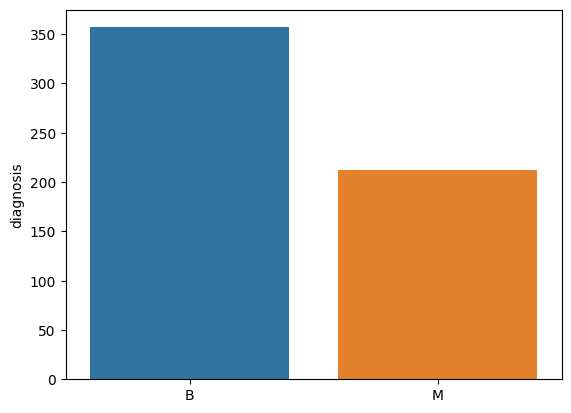

In [10]:
sns.barplot(x = df1['diagnosis'].value_counts().index, y = df1['diagnosis'].value_counts())

No significant class difference

In [11]:
# Column 'Unnamed: 32' has no values in it
# Drop the column

# Column 'id' has no significance while running models
# Drop the column

In [12]:
df2 = df1.drop(['id', 'Unnamed: 32'], axis = 1)
df2.shape

(569, 31)

In [13]:
df2['diagnosis'] = df2['diagnosis'].replace({'B':0, 'M':1})

In [14]:
df2['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

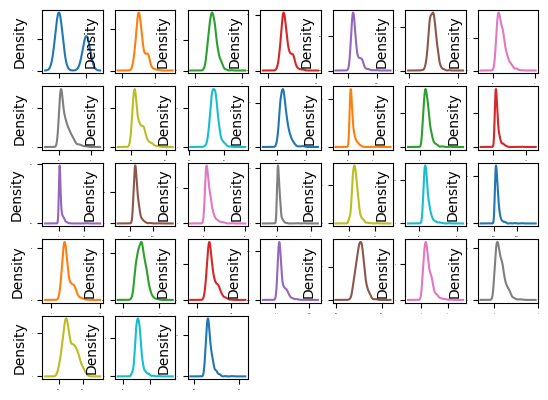

In [15]:
df2.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=False, fontsize=0.6)
plt.show()

# Data Preprocessing

In [16]:
df3 = df2.copy(deep = True)

In [17]:
df3.shape

(569, 31)

In [18]:
df3.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
X = df3.drop('diagnosis', axis = 1)
y = df3['diagnosis']

In [20]:
X.shape

(569, 30)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [22]:
X_train.shape, X_test.shape

((398, 30), (171, 30))

# Basic check - all models

In [23]:
models = [('CART', DecisionTreeClassifier()), ('SVM', SVC()), ('Naive Bayes', GaussianNB()), ('KNN', KNeighborsClassifier())]

In [24]:
all_scores =[]
model_names = []

for name, model in models:
    kfold = KFold(n_splits = 10)
    start = time.time()
    cv_scores = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    end = time.time()
    all_scores.append(cv_scores)
    model_names.append(name)
    print(f'{name}: accuracy => {cv_scores.mean():.5f} (run_time => {end - start : 0.5f})')

CART: accuracy => 0.93712 (run_time =>  0.24230)
SVM: accuracy => 0.91455 (run_time =>  0.19669)
Naive Bayes: accuracy => 0.93724 (run_time =>  0.09150)
KNN: accuracy => 0.93968 (run_time =>  0.50105)


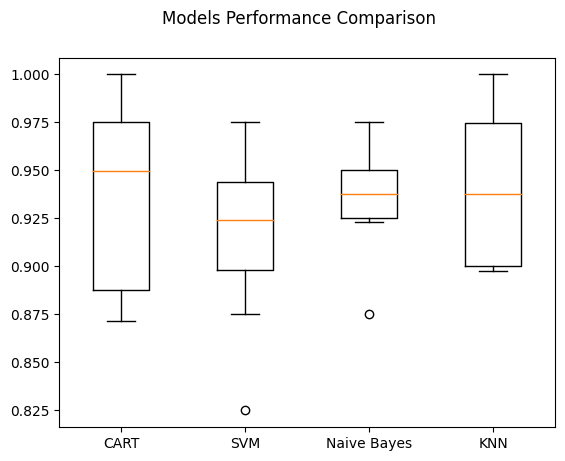

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(all_scores)
fig.suptitle('Models Performance Comparison')
ax.set_xticklabels(model_names)
plt.show()

On initial run, all models seem to have same performace with no significant difference

# Applying models on standardised data

In [26]:
pipelines = [('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])),\
            ('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])),\
             ('ScaledNaiveBayes', Pipeline([('Scaler', StandardScaler()), ('NaiveBayes', GaussianNB())])),\
             ('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())]))
            ]

In [27]:
all_scores = []
models_names = []

for name, model in pipelines:
    kfold = KFold(n_splits = 10)
    start = time.time()
    cv_scores = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    end = time.time()
    all_scores.append(cv_scores)
    models_names.append(name)
    print(f'{name} accuracy: {cv_scores.mean():.5f} (runtime: {end - start: .5f})')

ScaledCART accuracy: 0.93724 (runtime:  0.20918)
ScaledSVM accuracy: 0.96968 (runtime:  0.21088)
ScaledNaiveBayes accuracy: 0.93224 (runtime:  0.13378)
ScaledKNN accuracy: 0.95462 (runtime:  0.30200)


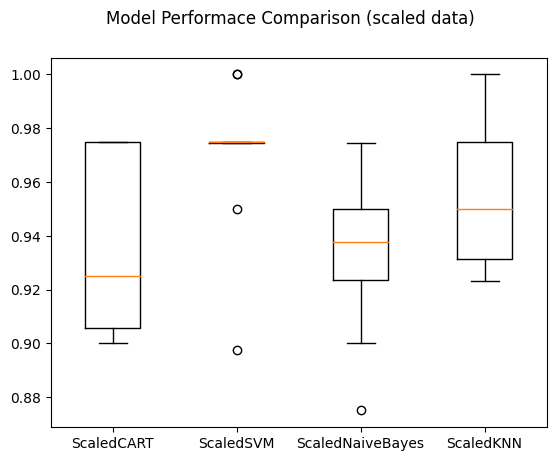

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(all_scores)
fig.suptitle('Model Performace Comparison (scaled data)')
ax.set_xticklabels(models_names)
plt.show()

With scaled data, perfomance of all data have improved significantly

SVM appears best among all models for the given data set

# Parameter Tuning - SVM Algorithm

Data to be standardised

SVM algorithm has 2 parameters to tune: C values and Kernel functions

C Values = \[0.1, 0.3, 0.5, 0.7, 1.0, 1.3, 1.5, 1.7, 2.0\]

Kernel functions = \['linear', 'poly', 'rbf', 'sigmoid'\]

In [29]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X_train)

C_values = [0.1, 0.3, 0.5, 0.7, 1.0, 1.3, 1.5, 1.7, 2.0]
Kernel_functions = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C = C_values, kernel = Kernel_functions)

model = SVC()
kfold = KFold(n_splits = 10)

grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = kfold, scoring = 'accuracy')
grid_result = grid.fit(X_scaled, y_train)


In [30]:
grid_result.cv_results_

{'mean_fit_time': array([0.00402191, 0.00910637, 0.01031923, 0.00923328, 0.00461354,
        0.00722804, 0.00932741, 0.00747609, 0.00547903, 0.00780044,
        0.00823071, 0.00695863, 0.00511153, 0.0071017 , 0.00759871,
        0.00634978, 0.00568829, 0.00680995, 0.00696158, 0.00562766,
        0.00588279, 0.00700169, 0.00724921, 0.00552328, 0.00587506,
        0.00665896, 0.0069031 , 0.00539305, 0.00624936, 0.00650747,
        0.00737796, 0.00500414, 0.00672572, 0.00665843, 0.00690722,
        0.00524766]),
 'std_fit_time': array([0.00052436, 0.00081585, 0.00146731, 0.0012794 , 0.00043737,
        0.00064554, 0.00193777, 0.00086382, 0.00056654, 0.00065804,
        0.00073178, 0.00141214, 0.00046924, 0.00052779, 0.00128527,
        0.00063495, 0.00070823, 0.00048642, 0.0002472 , 0.00062422,
        0.00094094, 0.00063169, 0.00080576, 0.00065804, 0.00104404,
        0.00044924, 0.00030238, 0.00048776, 0.00062716, 0.00053542,
        0.00050076, 0.00077031, 0.00110005, 0.00056699, 0.000

In [31]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, std, params in zip(means, stds, params):
    print(f'mean: {mean:.5f} (std: {std:.5f}) with params: {params}')

mean: 0.97218 (std: 0.02905) with params: {'C': 0.1, 'kernel': 'linear'}
mean: 0.82647 (std: 0.03160) with params: {'C': 0.1, 'kernel': 'poly'}
mean: 0.93712 (std: 0.03926) with params: {'C': 0.1, 'kernel': 'rbf'}
mean: 0.93955 (std: 0.04530) with params: {'C': 0.1, 'kernel': 'sigmoid'}
mean: 0.96974 (std: 0.02218) with params: {'C': 0.3, 'kernel': 'linear'}
mean: 0.85154 (std: 0.04048) with params: {'C': 0.3, 'kernel': 'poly'}
mean: 0.95218 (std: 0.03648) with params: {'C': 0.3, 'kernel': 'rbf'}
mean: 0.96474 (std: 0.03024) with params: {'C': 0.3, 'kernel': 'sigmoid'}
mean: 0.97224 (std: 0.02120) with params: {'C': 0.5, 'kernel': 'linear'}
mean: 0.86410 (std: 0.04724) with params: {'C': 0.5, 'kernel': 'poly'}
mean: 0.96474 (std: 0.02578) with params: {'C': 0.5, 'kernel': 'rbf'}
mean: 0.96718 (std: 0.03004) with params: {'C': 0.5, 'kernel': 'sigmoid'}
mean: 0.97224 (std: 0.02120) with params: {'C': 0.7, 'kernel': 'linear'}
mean: 0.87410 (std: 0.06204) with params: {'C': 0.7, 'kernel': 

In [32]:
print(f'Best score: {grid_result.best_score_}, \nBest Parameters: {grid_result.best_params_}')

Best score: 0.9747435897435898, 
Best Parameters: {'C': 1.0, 'kernel': 'linear'}


# Fitting best params on dataset

In [33]:
model = SVC(C = 1.5, kernel= 'linear')
start = time.time()
model.fit(X_scaled, y_train)
end = time.time()

print(f'runtime: {end-start:.5f}')

runtime: 0.00529


In [34]:
scaler = StandardScaler().fit(X_train)

X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

In [35]:
print(f'Accuracy score is {accuracy_score(y_test, y_pred)}')

Accuracy score is 0.9824561403508771


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       106
           1       0.97      0.98      0.98        65

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [37]:
print(confusion_matrix(y_test, y_pred))

[[104   2]
 [  1  64]]
